## Libraries import

In [1]:
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import FuncFormatter


#per poter gestire file csv
import pandas as pd

download dataset from  kaggle: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

In [13]:
!kaggle datasets download uom190346a/sleep-health-and-lifestyle-dataset

sleep-health-and-lifestyle-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


### Extract and unzip dataset

In [14]:
zip_path = r"C:\Users\greta\Downloads\sleep-health-and-lifestyle-dataset.zip"
final_path = r"C:\Users\Greta\Desktop\Sleep_Data" 

# Crea la directory di destinazione se non esiste
os.makedirs(final_path, exist_ok=True)


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(final_path)

In [2]:
#LO USA GIACOMO
dataset = r"C:\Users\Giacomo\Desktop\MagistraleDocumenti\AAA - Data Visualization\Python projects\PROGETTO GIT\Sleep_Data\Sleep_health_and_lifestyle_dataset.csv"
#dataset = r"C:\Users\Greta\Desktop\Sleep_Data\Sleep_health_and_lifestyle_dataset.csv" 
# Carica i dati in un DataFrame
df = pd.read_csv(dataset)

# Data visualization: overview of dataset and cleaning data

### Original dataset sample

In [3]:
df.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
df_mod = [column for column in df.columns if column!='Person ID']
for column in df_mod:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")


Unique values in 'Gender': ['Male' 'Female']
Unique values in 'Age': [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59]
Unique values in 'Occupation': ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
Unique values in 'Sleep Duration': [6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1
 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]
Unique values in 'Quality of Sleep': [6 4 7 5 8 9]
Unique values in 'Physical Activity Level': [42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]
Unique values in 'Stress Level': [6 8 7 4 3 5]
Unique values in 'BMI Category': ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Unique values in 'Blood Pressure': ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## CLEANING DATA AND DISTRIBUTION OVERVIEW:

### SLEEP DISORDER

In [5]:
# sostituisco i valori NaN con 'No disorder'
df['Sleep Disorder'].fillna('No Disorder', inplace=True)

C:\Users\Giacomo\AppData\Local\Temp\ipykernel_8776\1802460464.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna('No Disorder', inplace=True)


In [6]:
sleep_disorder_conteggio = df['Sleep Disorder'].value_counts().reset_index()
#print(sleep_disorder_conteggio)

In [37]:
fig=px.pie(sleep_disorder_conteggio,values='count',names='Sleep Disorder',title="<b>Sleep Disorder category</b>")

fig.update_layout(
    showlegend = True,
    width=800, 
    height=600  
)

fig.add_annotation(
    x=0.9,  
    y=-0.04,  
    text="Data source:<br>Sleep Health and lifestyle dataset", 
    showarrow=False,  
    font=dict(size=10, color="black"),  
    align="left",  
    xanchor="left",  
    yanchor="top",  
    xref="paper", 
    yref="paper",  
)

fig.show()

### BODY MASS INDEX (BMI)

In [8]:
#sostituisco normal con normal weight
df['BMI Category']=df['BMI Category'].replace({'Normal':'Normal Weight'})
BMI_Category_conteggio=df['BMI Category'].value_counts().reset_index()
#BMI_Category_conteggio

In [40]:
fig=px.pie(BMI_Category_conteggio,values='count',names='BMI Category',title="<b>The BMI Category</b>")

fig.update_layout(
    showlegend = True,
    width=800, 
    height=600  
)

fig.add_annotation(
    x=0.9,  
    y=-0.04,  
    text="Data source:<br>Sleep Health and lifestyle dataset", 
    showarrow=False,  
    font=dict(size=10, color="black"),  
    align="left",  
    xanchor="left",  
    yanchor="top",  
    xref="paper", 
    yref="paper",  
)

fig.show()

### GENDER

In [43]:
gender_conteggio = df["Gender"].value_counts().reset_index()
fig = px.pie( gender_conteggio , values= "count", names="Gender",title="<b>Gender</b>")

fig.update_layout(
    showlegend = True,
    width=800, 
    height=600  
)

fig.add_annotation(
    x=0.85,  
    y=-0.04,  
    text="Data source:<br>Sleep Health and lifestyle dataset", 
    showarrow=False,  
    font=dict(size=10, color="black"),  
    align="left",  
    xanchor="left",  
    yanchor="top",  
    xref="paper", 
    yref="paper",  
)

fig.show()

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# What do you want to know about your data?
# HOW PEOPLE’S SLEEP CHANGES BASED ON VARIOUS FACTORS

1. How much does the number of hours of sleep (on average) change according to age and gender? Is it true that the older you get, the less you sleep?  
2. Is it true that stressfull occupations may lead to Sleep Disorders (analyzed Insommia and Sleep Apnea)?
3. Is there a correlation between BMI index and sleep disorder?
4. Are heart rate and blood pressure somehow related to sleep quality?
5. Does the percentage of sleep disorder decreases with age?

## 1. How much does the number of hours of sleep (on average) change according to age and gender? Is it true that the older you get, the less you sleep?  

In [11]:
# creo la colonna dei raggruppamenti per età
df['bin_age'] = pd.cut(df['Age'], bins=[25, 30, 35 ,40, 45,50,55 ], 
                          labels=['25-30', '31-35', '36-40', '41-45', '46-50', '51+'])

# calcolo la media della qualità del sonno per ciascun gruppo di età
age_group = df.groupby(['bin_age', 'Gender'])['Sleep Duration'].mean().reset_index()

C:\Users\Giacomo\AppData\Local\Temp\ipykernel_8776\2016626394.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [12]:
#male_data = age_group[age_group['Gender'] == 'Male']
#female_data = age_group[age_group['Gender'] == 'Female']

In [35]:
fig = px.bar(
    age_group,
    x="bin_age",
    y="Sleep Duration",
    color="Gender",
    barmode="group", 
    title="<b>Sleep Hours average between each Age Group</b><br><sup>According to \"National Sleep Foundation\", adults are recommended to sleep at least 7 hours</sup>",
    labels={"bin_age": "Age", "Sleep Duration": "Sleep Duration(hrs)", "Gender": "Gender"},
    color_discrete_map={'Male': '#1f77b4', 'Female':'#ff7f0e'}
)

fig.add_hline(
    y=7,
    line=dict(color="red", dash="dash", width=2),
    annotation_text="7 hrs",  
    annotation_position="top right", 
    annotation_font_size=12
)


fig.update_layout(
    xaxis_title="Age Group",  
    yaxis_title="",  
    legend_title="Gender",  
    title_font_size=18, 
    yaxis=dict(range=[0, age_group['Sleep Duration'].max() + 1],  
        tickformat=".0f",  
        ticksuffix="h"), 
    margin=dict(t=120, b=120, l=50, r=50),  
    template="plotly_white",
)


fig.add_annotation(
    x=0.95,  
    y=-0.04,  
    text="Data source:<br>Sleep Health and lifestyle dataset", 
    showarrow=False,  
    font=dict(size=10, color="black"),  
    align="left",  
    xanchor="left",  
    yanchor="top",  
    xref="paper", 
    yref="paper",  
)


fig.update_layout(
    margin=dict(t=80, b=80, l=50, r=50),
    height=800,
    width=1600
)

fig.show()

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Is it true that stressfull occupations may lead to Sleep Disorders (analyzed Insommia and Sleep Apnea)?

In [14]:
sleep_disorders = df[df['Sleep Disorder'] != 'No Disorder']

disorder_conteggio= sleep_disorders.groupby(['Occupation', 'Sleep Disorder']).size().unstack(fill_value=0)

In [15]:
tot = df['Occupation'].value_counts()

#percentuale di persone con disturbi del sonno per ogni occupazione
disorder_percentages = disorder_conteggio.div(tot, axis=0) * 100

In [16]:
disorder_percentages = disorder_percentages.reset_index().melt(id_vars='Occupation', 
                                                               var_name='Sleep Disorder', 
                                                               value_name='Percentage')


In [44]:
fig = px.bar(disorder_percentages, x='Percentage', y='Occupation', color='Sleep Disorder', 
             title='<b>Percentage of workers that suffer from Sleep Disorders for each Occupation<b>',
             labels={'Sleep Disorder': 'Sleep Disorder', 'Percentage': 'Percentuale'},
             color_discrete_map={'Insomnia': '#8e44ad', 'Sleep Apnea': '#1abc9c'},
             orientation='h')


fig.update_layout(
    barmode='stack',  
    yaxis={'categoryorder': 'total ascending'},  
    xaxis_title='Percentage of workers that suffer from Sleep Disorder',
    yaxis_title='',
    legend_title='Sleep Disorder:',
    template='plotly_white', 
    margin=dict(l=120, r=20, t=50, b=50)
)


fig.update_traces(
    hovertemplate="<b>Sleep Disorder:%{color_discrete_sequence} <b>Percentuale:</b> %{x:.2f}%"
)


fig.add_annotation(
    x=0.98,  
    y=0,  
    text="Data source:<br>Sleep Health and lifestyle dataset", 
    showarrow=False,  
    font=dict(size=10, color="black"),  
    align="left",  
    xanchor="left",  
    yanchor="top",  
    xref="paper", 
    yref="paper",  
)


for trace in fig.data:
    trace.customdata = disorder_percentages[disorder_percentages['Sleep Disorder'] == trace.name]['Sleep Disorder']
    trace.hovertemplate = '%{customdata}<br>%{x:.2f}%'
    trace.hoverlabel = {'namelength':0}



fig.show()

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 3. Is there a correlation between BMI index and sleep disorder?

In [18]:
bmi_percent = df.groupby(['BMI Category', 'Sleep Disorder']).size().unstack(fill_value=0)
bmi_percent = bmi_percent.div(bmi_percent.sum(axis=1), axis=0) * 100


bmi_percent = bmi_percent.reset_index()
bmi_percent = bmi_percent.melt(id_vars='BMI Category', var_name='Sleep Disorder', value_name='Percentage')

In [19]:
fig = px.histogram(
    bmi_percent,
    x="BMI Category",
    y="Percentage",
    color="Sleep Disorder",
    title="<b>Percentage of Sleep Disorders for each BMI Category</b>",
    category_orders={'Sleep Disorder': ['Insomnia', 'Sleep Apnea', 'None'], 'BMI Category': ['Normal Weight', 'Overweight', 'Obese']},
    labels={"BMI Category": "BMI Category", "Percentage": "Percentuale", "Sleep Disorder": "Sleep Disorder:"},
    barmode="stack", 
    color_discrete_map={'Insomnia': '#8e44ad', 'Sleep Apnea': '#1abc9c', 'No Disorder': '#E0E0E0'}
)

fig.add_annotation(
    x=0.95,  
    y=-0.03,  
    text="Data source:<br>Sleep Health and lifestyle dataset", 
    showarrow=False,  
    font=dict(size=10, color="black"),  
    align="left",  
    xanchor="left",  
    yanchor="top",  
    xref="paper", 
    yref="paper",  
)

fig.update_layout(
    barmode='stack',
    yaxis={'title': '', 'tickformat':''},
    plot_bgcolor='rgba(255,255,255,255)', 
    paper_bgcolor='rgba(255,255,255,255)',
    showlegend = True,
    width=1000, 
    height=800  
)

fig.update_traces(marker_line_width=0.5, marker_line_color="black")  

fig.show()

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 4. Are heart rate and blood pressure somehow related to sleep quality?

### Aggregating by Sleep Quality

Using the scatterplot make the graph too much cluttered, so let's aggregate the instances by Sleep Quality, then plot the Heart Rate mean for each group as a line plot.

In [57]:
data = pd.read_csv(dataset)

def calculate_map(bp):
    max_bp, min_bp = map(int, bp.split('/'))
    return min_bp + (max_bp - min_bp) / 3

data['MAP'] = data['Blood Pressure'].apply(calculate_map)

aggregated_data = data.groupby('Quality of Sleep').agg({
    'Heart Rate': 'mean',
    'MAP': 'mean'
}).reset_index()

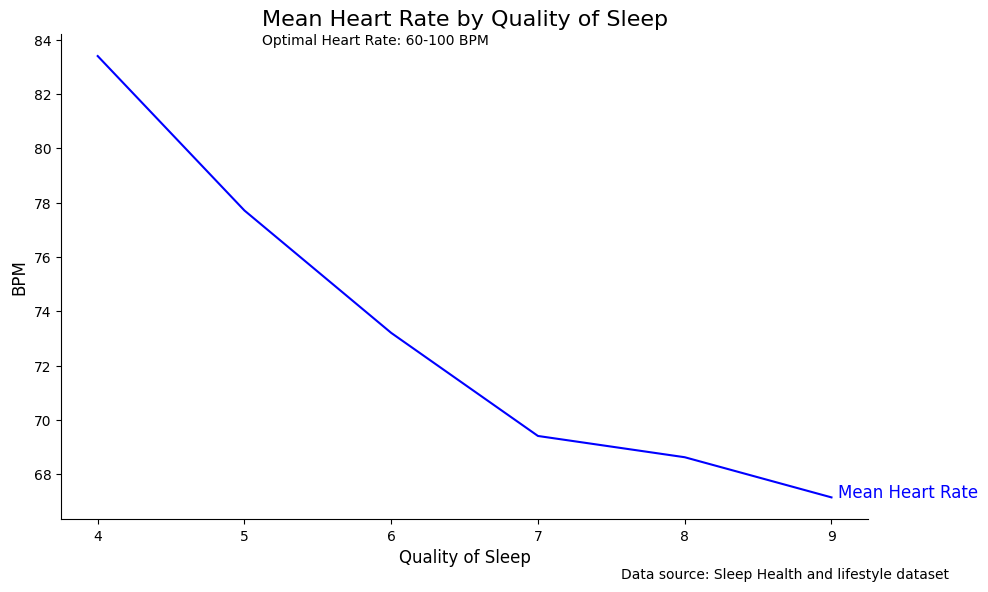

In [65]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=aggregated_data, x='Quality of Sleep', y='Heart Rate', label='Mean Heart Rate', color='b')
sns.despine()

plt.title('Mean Heart Rate by Quality of Sleep', fontsize=16)
plt.xlabel('Quality of Sleep', fontsize=12)
plt.ylabel('BPM', fontsize=12)

for line in plt.gca().lines:
    line_label = line.get_label()
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    plt.annotate(line_label, xy=(x_data[-1], y_data[-1]), xytext=(5, 0), textcoords='offset points', color=line.get_color(), fontsize=12)


plt.text(1.1, -0.1, 'Data source: Sleep Health and lifestyle dataset', 
         ha='right', va='top', transform=plt.gca().transAxes, fontsize=10, color='black')

plt.text(0.53, 1, 'Optimal Heart Rate: 60-100 BPM', 
         ha='right', va='top', transform=plt.gca().transAxes, fontsize=10, color='black')

plt.legend().remove()
plt.tight_layout()
plt.show()

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 5. Does the percentage of sleep disorder decreases with age?

In [45]:
data = pd.read_csv(dataset)

data['Age Group'] = pd.cut(data['Age'], bins=[25, 30, 35, 40, 45, 50, 55], labels=['25-29', '30-34', '35-39', '40-44', '45-49', '50-54'])

data['Sleep Disorder'] = data['Sleep Disorder'].fillna('No Disorder')

disorder_counts = data.groupby(['Age Group', 'Sleep Disorder']).size().unstack(fill_value=0)
disorder_proportions = disorder_counts.div(disorder_counts.sum(axis=1), axis=0) * 100

disorder_proportions = disorder_proportions.reset_index()

melted_df = disorder_proportions.melt(id_vars='Age Group', var_name='Sleep Disorder', value_name='Percentage')

C:\Users\Giacomo\AppData\Local\Temp\ipykernel_8776\3347660295.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [52]:
fig = px.bar(melted_df, x='Age Group', y='Percentage', color='Sleep Disorder', text=None,
             title='<b>Percentage of sleep disorders for each age group</b>',
             labels={'Age Group': 'Age Group', 'Percentage': 'Percentage', 'Sleep Disorder': 'Sleep Disorder'},
             category_orders={'Sleep Disorder': ['Insomnia', 'Sleep Apnea', 'None']},
             color_discrete_map={'Insomnia': '#8e44ad', 'Sleep Apnea': '#1abc9c', 'No Disorder': '#E0E0E0'}
             )


fig.update_layout(
    barmode='stack',
    xaxis={'categoryorder':'category ascending'},
    yaxis={'title': 'Percentage (%)', 'tickformat':''},
    plot_bgcolor='rgba(255,255,255,255)', 
    paper_bgcolor='rgba(255,255,255,255)',
    showlegend = True,
    width=1500,  
    height=800  
)

fig.add_annotation(
    x=0.95,  
    y=-0.06,  
    text="Data source:<br>Sleep Health and lifestyle dataset", 
    showarrow=False,  
    font=dict(size=10, color="black"),  
    align="left",  
    xanchor="left",  
    yanchor="top",  
    xref="paper", 
    yref="paper",  
)

for trace in fig.data:
    trace.customdata = melted_df[melted_df['Sleep Disorder'] == trace.name]['Sleep Disorder']
    trace.hovertemplate = '%{customdata}<br>%{x}<br>%{y:.3f}%'
    trace.hoverlabel = {'namelength': 0}


fig.show()


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Conclusions

### 1. How much does the number of hours of sleep (on average) change according to age and gender? Is it true that the older you get, the less you sleep?
There are no significant differences in sleep duration across age groups; all tend to sleep less than the recommended 7 hours. The only noticeable trend is that females, on average, sleep slightly less than males.\


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 2. Is it true that stressfull occupations may lead to Sleep Disorders (analyzed Insommia and Sleep Apnea)?
We expected to find a higher percentage of sleep disorders in more stressful jobs. However, the data does not support this assumption: for instance, doctors and lawyers have fewer sleep disorders than teachers or salespeople.\




------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 3. Is there a correlation between BMI index and sleep disorder?
Yes, as less than 10% of people with a normal BMI suffer from sleep disorders. In contrast, among those with an overweight or obese BMI, the percentage of sleep disorders approaches 80-100%.\




------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 4. Are heart rate and blood pressure somehow related to sleep quality?
There is a strong correlation: as heart rate decreases, people tend to sleep better.\



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 5. Does the percentage of sleep disorder decreases with age?
This graph does not show any trend supporting our hypothesis.